<a href="https://colab.research.google.com/github/CarlMalings/hello_world/blob/main/test_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Code

In [1]:
print('Hello, world!')

Hello, world!


Install and load packages:

In [2]:
!pip install netCDF4
!pip install cartopy
!pip install earthaccess

import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc # NEEDED
import matplotlib.pyplot as plt  # needed to plot the resulting time series
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import earthaccess as ea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 71.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.5.1 which is incompatible.
torch 2.6.0+cu124 requ

Authorize EarthData Login:

In [ ]:
auth = ea.login(persist=True)

Enter your Earthdata Login username: carl_malings
Enter your Earthdata password: ··········


Specify point and time of interest:

In [ ]:
short_name = "TEMPO_NO2_L3"  # collection name to search for in the EarthData
version = "V03"

# Point of interest: NASA Langley Research Center, HamptonVA, USA
# latitude 37.1036 deg, longitude -76.3868 deg
# POI_lat = 37.1036
# POI_lon = -76.3868

# generic location, somewhere in the middle of the USA
POI_lat = 38.0
POI_lon = -96.0
date_start = "2024-09-01 00:00:00"
date_end = "2024-09-01 23:59:59"

Search for Data:

In [ ]:
POI_results = ea.search_data(
    short_name=short_name,
    version=version,
    temporal=(date_start, date_end),
    point=(POI_lon, POI_lat),  # search by point of interest
)

print(len(POI_results))

18


View the result:

In [ ]:
POI_results[0]

Collection: {'ShortName': 'TEMPO_NO2_L3', 'Version': 'V03'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 57.02, 'Longitude': -163.84}, {'Latitude': 56.94, 'Longitude': -163.72}, {'Latitude': 56.1, 'Longitude': -158.9}, {'Latitude': 55.08, 'Longitude': -154.7}, {'Latitude': 53.88, 'Longitude': -150.84}, {'Latitude': 52.4, 'Longitude': -147.02}, {'Latitude': 50.66, 'Longitude': -143.38}, {'Latitude': 48.7, 'Longitude': -140.02}, {'Latitude': 46.62, 'Longitude': -137.06}, {'Latitude': 44.1, 'Longitude': -134.08}, {'Latitude': 41.38, 'Longitude': -131.42}, {'Latitude': 38.42, 'Longitude': -129.02}, {'Latitude': 35.62, 'Longitude': -127.12}, {'Latitude': 32.42, 'Longitude': -125.3}, {'Latitude': 29.02, 'Longitude': -123.7}, {'Latitude': 25.44, 'Longitude': -122.32}, {'Latitude': 21.64, 'Longitude': -121.14}, {'Latitude': 17.56, 'Longitude': -120.14}, {'Latitude': 17.26, 'Longitude': -102.38}, {'Latitude': 17.22, 'Longitude': -83.74001}, {'Latitude': 29.44, 'Longitude': -82.82}, {'Latitude': 34.42, 'Longitude': -82.28}, {'Latitude': 40.04, 'Longitude': -81.5}, {'Latitude': 48.12, 'Longitude': -79.92}, {'Latitude': 52.84, 'Longitude': -78.62}, {'Latitude': 57.3, 'Longitude': -77}, {'Latitude': 57.92, 'Longitude': -77}, {'Latitude': 57.76, 'Longitude': -81.08}, {'Latitude': 57.64, 'Longitude': -86.98}, {'Latitude': 57.68, 'Longitude': -96.62}, {'Latitude': 58, 'Longitude': -106.2}, {'Latitude': 58.56, 'Longitude': -115.46}, {'Latitude': 59.48, 'Longitude': -126.08}, {'Latitude': 60.6, 'Longitude': -136.36}, {'Latitude': 62.08, 'Longitude': -147.78}, {'Latitude': 63.76, 'Longitude': -159.66}, {'Latitude': 63.6, 'Longitude': -159.68}, {'Latitude': 63.76, 'Longitude': -160.82}, {'Latitude': 62.04, 'Longitude': -160.96}, {'Latitude': 62.06, 'Longitude': -161.12}, {'Latitude': 61.96, 'Longitude': -161.14}, {'Latitude': 61.98, 'Longitude': -161.36}, {'Latitude': 61.88, 'Longitude': -161.38}, {'Latitude': 61.94, 'Longitude': -161.84}, {'Latitude': 60.58, 'Longitude': -162.06}, {'Latitude': 60.66, 'Longitude': -162.78}, {'Latitude': 59.58, 'Longitude': -162.8}, {'Latitude': 59.6, 'Longitude': -162.94}, {'Latitude': 58.2, 'Longitude': -163.1}, {'Latitude': 58.28, 'Longitude': -163.76}, {'Latitude': 57.96, 'Longitude': -163.84}, {'Latitude': 57.02, 'Longitude': -163.84}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-08-31T23:58:44+00:00', 'EndingDateTime': '2024-09-01T00:38:30+00:00'}}
Size(MB): 534.3889923095703
Data: ['https://data.asdc.earthdata.nasa.gov/asdc-prod-protected/TEMPO/TEMPO_NO2_L3_V03/2024.08.31/TEMPO_NO2_L3_V03_20240831T235844Z_S016.nc']

Try to get GEOS-CF Data:

/usr/local/lib/python3.11/dist-packages/xarray/coding/times.py:206: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)


<xarray.Dataset> Size: 215MB
Dimensions:          (time: 121, lev: 23, lat: 33, lon: 45)
Coordinates:
  * time             (time) datetime64[ns] 968B 2025-07-02T12:00:00 ... 2025-...
  * lev              (lev) float64 184B 1e+03 975.0 950.0 ... 100.0 50.0 10.0
  * lat              (lat) float64 264B 34.0 34.25 34.5 ... 41.5 41.75 42.0
  * lon              (lon) float64 360B -83.0 -82.75 -82.5 ... -72.25 -72.0
Data variables: (12/13)
    co               (time, lev, lat, lon) float32 17MB ...
    pm25du_rh35_gcc  (time, lev, lat, lon) float32 17MB ...
    pm25bc_rh35_gcc  (time, lev, lat, lon) float32 17MB ...
    pm25soa_rh35_gc  (time, lev, lat, lon) float32 17MB ...
    pm25oc_rh35_gcc  (time, lev, lat, lon) float32 17MB ...
    o3               (time, lev, lat, lon) float32 17MB ...
    ...               ...
    so2              (time, lev, lat, lon) float32 17MB ...
    noy              (time, lev, lat, lon) float32 17MB ...
    pm25ss_rh35_gcc  (time, lev, lat, lon) float32 17MB .

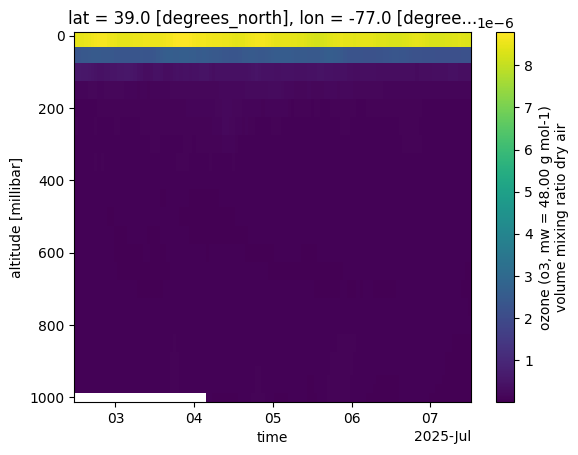

In [3]:
# Set the boundary:
n_lat_min = 34
n_lat_max = 42
n_lon_min = -83
n_lon_max = -72

# Load the dataset:
s_OPeNDAP_url = 'https://opendap.nccs.nasa.gov/dods/gmao/geos-cf/fcast/chm_inst_1hr_g1440x721_p23.latest'
a_data_subset = xr.open_dataset(s_OPeNDAP_url).loc[{'lat':slice(n_lat_min,n_lat_max),'lon':slice(n_lon_min,n_lon_max)}]

# Examine the dataset:
print(a_data_subset)

# Test-plot a time series of the forecast at a location
n_lat_plot = 38.90
n_lon_plot = -77.00
a_data_subset['o3'].sel(lat=n_lat_plot,lon=n_lon_plot,method='nearest').plot(x='time',y='lev',yincrease=False)